In [76]:
import csv
import random
import calendar
from datetime import datetime

mois_autorises = list(range(1, 13))


nb_normaux = 700
nb_total = 1000
nb_restants = nb_total - nb_normaux

with open("observations_crabe5.csv", "w", newline="", encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([
        "Timestamp", "Nb_Crabes", "Oxygene_mg_L",
        "Temperature_C", "Salinite_ppt", "pH",
        "Duree_immersion_min",
        "En_Reproduction", "En_Mue",
        "Alarme_Declenchee", "Observation"
    ])

    for i in range(nb_total):
        mois = random.choice(mois_autorises)
        _, nb_jours = calendar.monthrange(2025, mois)
        jour = random.randint(1, nb_jours)
        heure = random.randint(0, 23)
        minute = random.randint(0, 59)
        timestamp = datetime(2025, mois, jour, heure, minute).strftime("%Y/%m/%d %H:%M:%S")
        en_reproduction = "Oui" if mois in [5, 6, 7, 8, 9, 10] else "Non"
        en_mue = "Oui" if mois in [6, 7, 8] else "Non"

       
        if i < nb_normaux:
            nb_crabes = random.randint(0, 20)
            oxygene = round(random.uniform(3, 5), 1)
            temperature = round(random.uniform(20, 27), 1)
            salinite = round(random.uniform(15, 30), 1)
            ph = round(random.uniform(7.5, 8.5), 2)
            duree = random.randint(0, 1440)
        else:
            
            if random.random() < 0.05:
                nb_crabes = random.randint(14, 28)
            else:
                nb_crabes = random.randint(0, 20)

            if random.random() < 0.05:
                oxygene = round(random.uniform(0, 2.9), 1)
            else:
                oxygene = round(random.uniform(3, 5), 1)

            if random.random() < 0.05:
                temperature = round(random.uniform(-5, 50), 1)
                while 20 <= temperature <= 27:
                    temperature = round(random.uniform(-5, 50), 1)
            else:
                temperature = round(random.uniform(20, 27), 1)

            if random.random() < 0.05:
                salinite = round(random.uniform(0, 50), 1)
                while 15 <= salinite <= 30:
                    salinite = round(random.uniform(0, 50), 1)
            else:
                salinite = round(random.uniform(15, 30), 1)

            if random.random() < 0.05:
                ph = round(random.uniform(5.0, 10.0), 2)
                while 7.5 <= ph <= 8.5:
                    ph = round(random.uniform(5.0, 10.0), 2)
            else:
                ph = round(random.uniform(7.5, 8.5), 2)

            if random.random() < 0.05:
                duree = random.randint(1441, 2880)
            else:
                duree = random.randint(0, 1440)

        alarmes = []

        if oxygene < 3:
            alarmes.append("Oxygène critique")

        if nb_crabes > 20:
            alarmes.append("Surpopulation")

        if temperature < 20:
            alarmes.append("Température trop basse")

        if temperature > 27:
            alarmes.append("Température trop élevée")

        if salinite < 15:
            alarmes.append("Salinité trop basse")

        if salinite > 30:
            alarmes.append("Salinité trop élevée")

        if ph < 7.0:
            alarmes.append("pH trop acide")

        if ph > 8.5:
            alarmes.append("pH trop basique")

        if duree > 1440:
            alarmes.append("Durée d'immersion excessive")

        if en_reproduction == "Oui":
            alarmes.append("Période de reproduction")

        if en_mue == "Oui":
            alarmes.append("Période de mue")

        alarme_declenchee = "Oui" if alarmes else "Non"
        observation = "; ".join(alarmes) if alarmes else "Conditions normales"

        writer.writerow([
            timestamp, nb_crabes, oxygene,
            temperature, salinite, ph,
            duree, en_reproduction, en_mue,
            alarme_declenchee, observation
        ])


In [78]:
import pandas as pd
import numpy as np
import random


extreme_samples = []

for i in range(400):
    nb_crabes = random.randint(15, 25)         
    oxygene = round(random.uniform(0, 1.5), 1) 
    temperature = round(random.uniform(-5, 50), 1) 
    salinite = round(random.uniform(0, 50), 1)  
    ph = round(random.uniform(5.0, 10.0), 2)    
    duree = random.randint(1441, 3000)         
    En_Reproduction="Non"
    En_Mue="Non"
    alarmes = []

    if oxygene < 3:
        alarmes.append("Oxygène critique")
    if nb_crabes > 12:
        alarmes.append("Surpopulation")
    if temperature < 20:
        alarmes.append("Température trop basse")
    if temperature > 27:
        alarmes.append("Température trop élevée")
    if salinite < 15:
        alarmes.append("Salinité trop basse")
    if salinite > 40:
        alarmes.append("Salinité trop élevée")
    if ph < 7.0:
        alarmes.append("pH trop acide")
    if ph > 9.0:
        alarmes.append("pH trop basique")
    if duree > 1440:
        alarmes.append("Durée d'immersion excessive")

    alarme_declenchee = "Oui" if alarmes else "Non"
    observation = "; ".join(alarmes) if alarmes else "Conditions normales"

    
    timestamp = pd.Timestamp(
        year=2025,
        month=random.choice([1, 2, 3, 4, 11, 12]),
        day=random.randint(1, 28),
        hour=random.randint(0, 23),
        minute=random.randint(0, 59)
    ).strftime("%Y/%m-/%d %H:%M:%S")

    extreme_samples.append([
        timestamp, nb_crabes, oxygene,
        temperature, salinite, ph,
        duree,En_Reproduction,En_Mue, alarme_declenchee, observation
    ])
extreme_df = pd.DataFrame(extreme_samples, columns=[
    "Timestamp", "Nb_Crabes", "Oxygene_mg_L",
    "Temperature_C", "Salinite_ppt", "pH",
    "Duree_immersion_min","En_Reproduction","En_Mue" ,"Alarme_Declenchee", "Observation"
])
original_data = pd.read_csv("observations_crabe5.csv")
final_data = pd.concat([original_data, extreme_df], ignore_index=True)
final_data.to_csv("observations_crabes5.csv", index=False)


In [80]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.cluster import KMeans,AgglomerativeClustering , DBSCAN
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
 from sklearn.metrics import silhouette_score, silhouette_samples
 from scipy.cluster.hierarchy import dendrogram, linkage
 import warnings
 warnings.filterwarnings('ignore')
 data=pd.read_csv("observations_crabes5.csv",sep=",") 
 data

,Timestamp,Nb_Crabes,Oxygene_mg_L,Temperature_C,Salinite_ppt,pH,Duree_immersion_min,En_Reproduction,En_Mue,Alarme_Declenchee,Observation
0,2025/12/15 11:16:00,4,3.4,21.7,24.4,8.48,80,Non,Non,Non,Conditions normales
1,2025/01/21 03:13:00,8,4.4,23.7,24.0,7.70,1278,Non,Non,Non,Conditions normales
2,2025/06/20 19:14:00,6,3.8,21.6,20.5,8.21,645,Oui,Oui,Oui,Période de reproduction; Période de mue
3,2025/10/30 04:35:00,3,4.2,20.6,18.8,7.70,877,Oui,Non,Oui,Période de reproduction
4,2025/03/21 06:15:00,3,4.0,23.7,29.6,7.66,1041,Non,Non,Non,Conditions normales
...,...,...,...,...,...,...,...,...,...,...,...
1395,2025/04-/16 15:50:00,16,0.6,18.9,1.2,8.05,1974,Non,Non,Oui,Oxygène critique; Surpopulation; Température t...
1396,2025/01-/02 23:51:00,18,0.5,0.0,11.3,5.04,2475,Non,Non,Oui,Oxygène critique; Surpopulation; Température t...
1397,2025/03-/16 04:26:00,24,1.3,29.8,29.2,5.59,2697,Non,Non,Oui,Oxygène critique; Surpopulation; Température t...
1398,2025/01-/23 10:02:00,22,0.2,39.1,45.4,7.04,2685,Non,Non,Oui,Oxygène critique; Surpopulation; Température t...


In [82]:
data.drop(labels=["Timestamp","Observation"], axis=1, inplace=True)
data

,Nb_Crabes,Oxygene_mg_L,Temperature_C,Salinite_ppt,pH,Duree_immersion_min,En_Reproduction,En_Mue,Alarme_Declenchee
0,4,3.4,21.7,24.4,8.48,80,Non,Non,Non
1,8,4.4,23.7,24.0,7.70,1278,Non,Non,Non
2,6,3.8,21.6,20.5,8.21,645,Oui,Oui,Oui
3,3,4.2,20.6,18.8,7.70,877,Oui,Non,Oui
4,3,4.0,23.7,29.6,7.66,1041,Non,Non,Non
...,...,...,...,...,...,...,...,...,...
1395,16,0.6,18.9,1.2,8.05,1974,Non,Non,Oui
1396,18,0.5,0.0,11.3,5.04,2475,Non,Non,Oui
1397,24,1.3,29.8,29.2,5.59,2697,Non,Non,Oui
1398,22,0.2,39.1,45.4,7.04,2685,Non,Non,Oui


In [84]:
from sklearn.preprocessing import MinMaxScaler


data["Nb_Crabes"] = data["Nb_Crabes"].astype("float64")
data["Oxygene_mg_L"] = data["Oxygene_mg_L"].astype("float64")
data["Temperature_C"] = data["Temperature_C"].astype("float64")
data["Salinite_ppt"] = data["Salinite_ppt"].astype("float64")
data["pH"] = data["pH"].astype("float64")
data["Duree_immersion_min"] = data["Duree_immersion_min"].astype("float64")

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[["Nb_Crabes","Oxygene_mg_L","Temperature_C","Salinite_ppt","pH","Duree_immersion_min"]])


data[["Nb_Crabes","Oxygene_mg_L","Temperature_C","Salinite_ppt","pH","Duree_immersion_min"]] = scaled

print("✅ Scaling terminé")
data

✅ Scaling terminé


,Nb_Crabes,Oxygene_mg_L,Temperature_C,Salinite_ppt,pH,Duree_immersion_min,En_Reproduction,En_Mue,Alarme_Declenchee
0,0.142857,0.68,0.484517,0.486922,0.695391,0.026667,Non,Non,Non
1,0.285714,0.88,0.520947,0.478873,0.539078,0.426000,Non,Non,Non
2,0.214286,0.76,0.482696,0.408451,0.641283,0.215000,Oui,Oui,Oui
3,0.107143,0.84,0.464481,0.374245,0.539078,0.292333,Oui,Non,Oui
4,0.107143,0.80,0.520947,0.591549,0.531062,0.347000,Non,Non,Non
...,...,...,...,...,...,...,...,...,...
1395,0.571429,0.12,0.433515,0.020121,0.609218,0.658000,Non,Non,Oui
1396,0.642857,0.10,0.089253,0.223340,0.006012,0.825000,Non,Non,Oui
1397,0.857143,0.26,0.632058,0.583501,0.116232,0.899000,Non,Non,Oui
1398,0.785714,0.04,0.801457,0.909457,0.406814,0.895000,Non,Non,Oui


In [86]:
data["En_Reproduction"] = data["En_Reproduction"].map({"Oui": 1, "Non": 0})
data["En_Mue"] = data["En_Mue"].map({"Oui": 1, "Non": 0})
data

,Nb_Crabes,Oxygene_mg_L,Temperature_C,Salinite_ppt,pH,Duree_immersion_min,En_Reproduction,En_Mue,Alarme_Declenchee
0,0.142857,0.68,0.484517,0.486922,0.695391,0.026667,0,0,Non
1,0.285714,0.88,0.520947,0.478873,0.539078,0.426000,0,0,Non
2,0.214286,0.76,0.482696,0.408451,0.641283,0.215000,1,1,Oui
3,0.107143,0.84,0.464481,0.374245,0.539078,0.292333,1,0,Oui
4,0.107143,0.80,0.520947,0.591549,0.531062,0.347000,0,0,Non
...,...,...,...,...,...,...,...,...,...
1395,0.571429,0.12,0.433515,0.020121,0.609218,0.658000,0,0,Oui
1396,0.642857,0.10,0.089253,0.223340,0.006012,0.825000,0,0,Oui
1397,0.857143,0.26,0.632058,0.583501,0.116232,0.899000,0,0,Oui
1398,0.785714,0.04,0.801457,0.909457,0.406814,0.895000,0,0,Oui


In [88]:
X = data.drop(columns=['Alarme_Declenchee'])  
y = data['Alarme_Declenchee'].map({'Oui': 1, 'Non': 0})  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


clf = DecisionTreeClassifier(random_state=42)


clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9976190476190476

Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       137
           1       1.00      1.00      1.00       283

    accuracy                           1.00       420
   macro avg       1.00      1.00      1.00       420
weighted avg       1.00      1.00      1.00       420


Matrice de confusion :
 [[137   0]
 [  1 282]]


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


y_pred_logreg = logreg.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("\nClassification report:\n", classification_report(y_test, y_pred_logreg))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy : 0.9857142857142858

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       137
           1       1.00      0.98      0.99       283

    accuracy                           0.99       420
   macro avg       0.98      0.99      0.98       420
weighted avg       0.99      0.99      0.99       420


Matrice de confusion:
 [[137   0]
 [  6 277]]


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("\nClassification report:\n", classification_report(y_test, y_pred_rf))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy : 0.9952380952380953

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       137
           1       1.00      0.99      1.00       283

    accuracy                           1.00       420
   macro avg       0.99      1.00      0.99       420
weighted avg       1.00      1.00      1.00       420


Matrice de confusion:
 [[137   0]
 [  2 281]]


In [96]:

sample = pd.DataFrame([{
    "Nb_Crabes": 10,
    "Oxygene_mg_L": 2.5,
    "Temperature_C": 28,
    "Salinite_ppt": 35,
    "pH": 7.8,
    "Duree_immersion_min": 200,
    "En_Reproduction": 0,
    "En_Mue": 0
}])
scaler = MinMaxScaler()
scaler.fit(X)  
sample_scaled = scaler.transform(sample)
prediction =logreg.predict(sample_scaled)
print("Prédiction :", prediction[0])


Prédiction : 1


In [98]:
from sklearn.preprocessing import StandardScaler
X_clust = data.drop(columns=['Alarme_Declenchee', 'Cluster']) if 'Cluster' in data.columns else data.drop(columns=['Alarme_Declenchee'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)

In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters
score = silhouette_score(X_scaled, clusters)
print(f"Score silhouette : {score:.2f}")

Score silhouette : 0.36


In [102]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
clusters_agglo = agglo.fit_predict(X)
from sklearn.metrics import silhouette_score
print("Silhouette Score :", silhouette_score(X, clusters_agglo))

Silhouette Score : 0.4430973894392665


In [104]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
features = [
    "Nb_Crabes", "Oxygene_mg_L", "Temperature_C", 
    "Salinite_ppt", "pH", "Duree_immersion_min"
]

X = data[features]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
meanshift = MeanShift()
labels = meanshift.fit_predict(X_scaled)
n_clusters = len(np.unique(labels))
if n_clusters > 1:
    score = silhouette_score(X_scaled, labels)
    print(f"✅ Nombre de clusters trouvés : {n_clusters}")
    print(f"✅ Score silhouette : {score:.4f}")
else:
    print("⚠️ Impossible de calculer le score silhouette (moins de 2 clusters)")


✅ Nombre de clusters trouvés : 3
✅ Score silhouette : 0.4547


In [106]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0) 
labels = gmm.fit_predict(X_scaled)

score = silhouette_score(X_scaled, labels)
print(f"✅ Score silhouette (GMM): {score:.4f}")


✅ Score silhouette (GMM): 0.2854


In [108]:
import pandas as pd


data = pd.read_csv("observations_crabe_bleu_complet.csv", parse_dates=["Timestamp"])
data = data.sort_values("Timestamp")

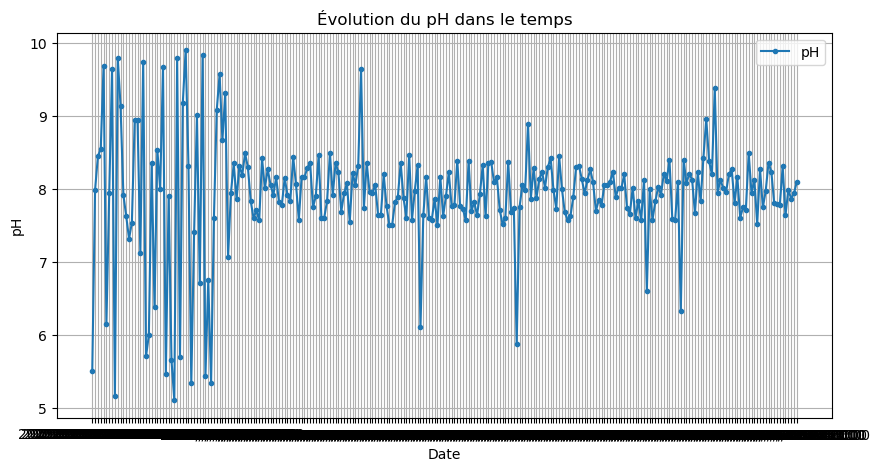

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data["Timestamp"], data["pH"], marker='.', linestyle='-', label="pH")
plt.xlabel("Date")
plt.ylabel("pH")
plt.title("Évolution du pH dans le temps")
plt.legend()
plt.grid(True)
plt.show()

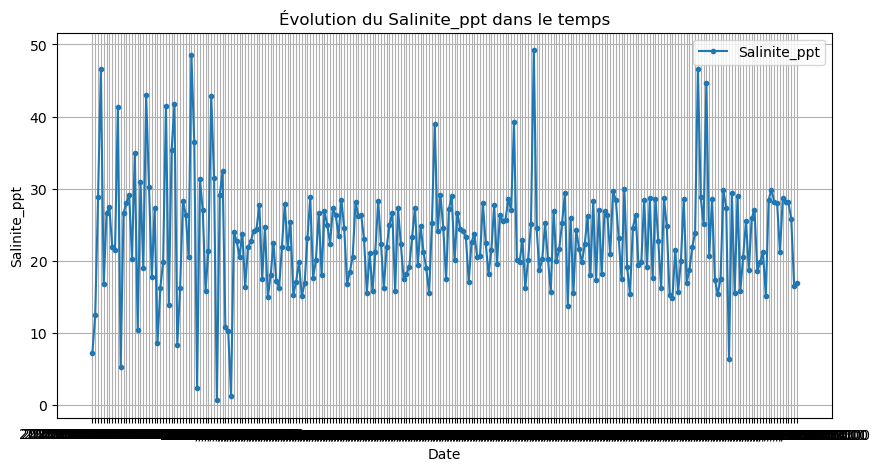

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data["Timestamp"], data["Salinite_ppt"], marker='.', linestyle='-', label="Salinite_ppt")
plt.xlabel("Date")
plt.ylabel("Salinite_ppt")
plt.title("Évolution du Salinite_ppt dans le temps")
plt.legend()
plt.grid(True)
plt.show()

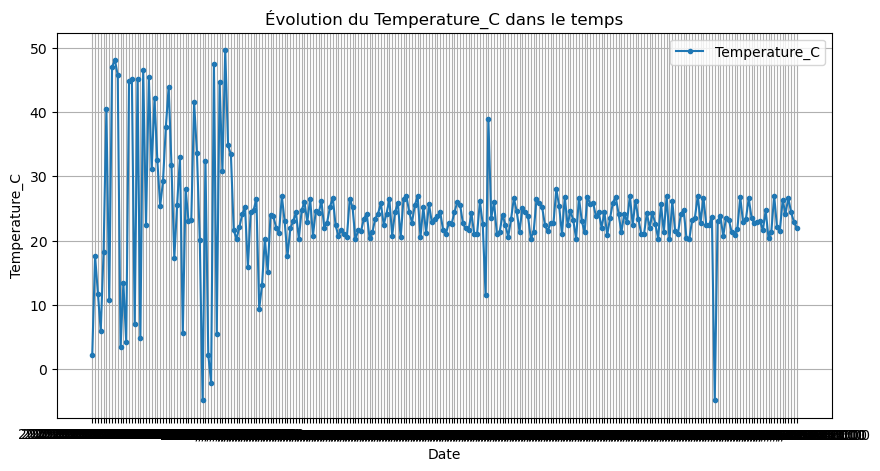

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data["Timestamp"], data["Temperature_C"], marker='.', linestyle='-', label="Temperature_C")
plt.xlabel("Date")
plt.ylabel("Temperature_C")
plt.title("Évolution du Temperature_C dans le temps")
plt.legend()
plt.grid(True)
plt.show()


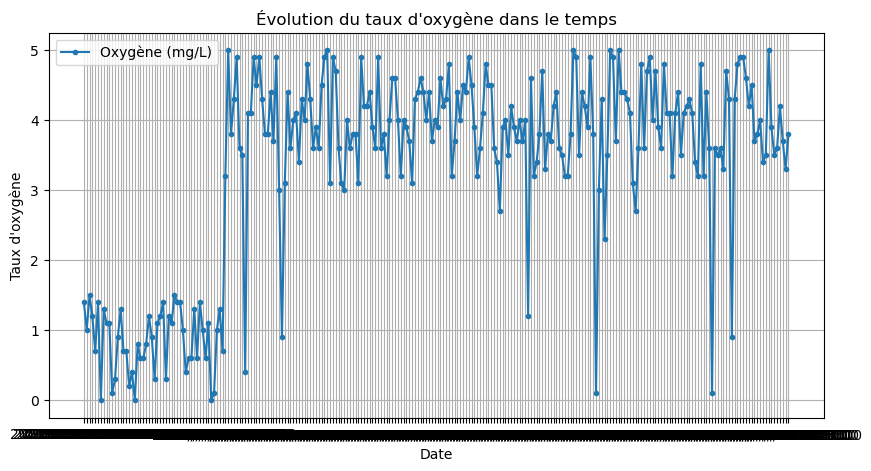

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data["Timestamp"], data["Oxygene_mg_L"], marker='.', linestyle='-', label="Oxygène (mg/L)")
plt.xlabel("Date")
plt.ylabel("Taux d'oxygène")
plt.title("Évolution du taux d'oxygène dans le temps")
plt.legend()
plt.grid(True)
plt.show()


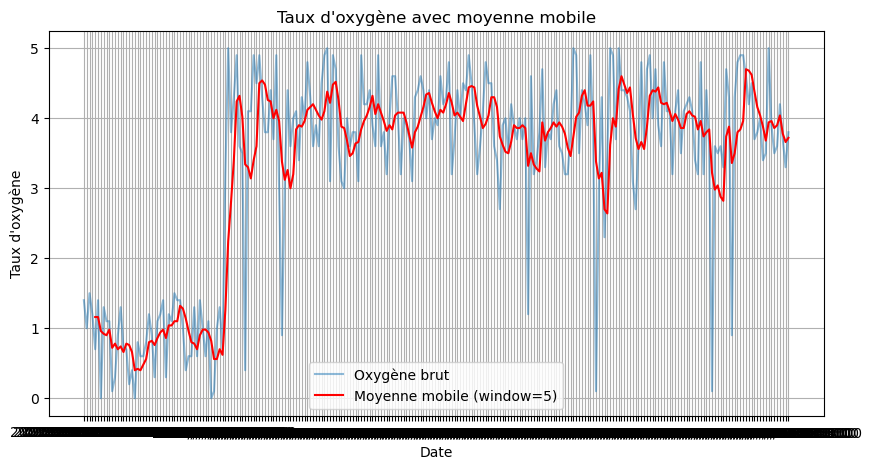

In [118]:
data["Oxygene_MoyenneMobile"] = data["Oxygene_mg_L"].rolling(window=5).mean()

plt.figure(figsize=(10, 5))
plt.plot(data["Timestamp"], data["Oxygene_mg_L"], alpha=0.5, label="Oxygène brut")
plt.plot(data["Timestamp"], data["Oxygene_MoyenneMobile"], color='red', label="Moyenne mobile (window=5)")
plt.xlabel("Date")
plt.ylabel("Taux d'oxygène")
plt.title("Taux d'oxygène avec moyenne mobile")
plt.legend()
plt.grid(True)
plt.show()
